In [58]:
import pandas as pd 
df= pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Employee Attrition/Employee-Attrition - Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [46]:
df.shape

(1470, 35)

In [59]:
#Remove redundant columns
df.drop(columns=["EmployeeCount", "StandardHours", "Over18"], inplace=True)

In [60]:
df.drop_duplicates(inplace=True)

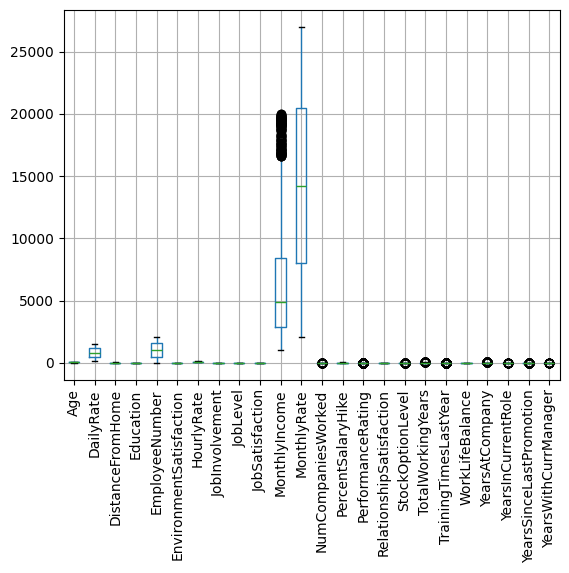

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



# Check for outliers
df.boxplot(rot = 90)
plt.show()

In [63]:
# Handle outliers using IQR method
numerical_cols = df.select_dtypes(include=['int64']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [64]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,15,4,...,3,4,0,10,3,3,9,5,0,8
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,16,1,...,3,4,1,5,1,2,5,2,4,3


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_correlation(df):
   
    # Attempt to convert all columns to numeric, handling errors
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') # coerce will turn invalid parses into NaN.

    # Drop any columns that are not numeric after the conversion.
    df = df.select_dtypes(include=['number'])

    if df.empty:
        print("No numeric columns found in the DataFrame.")
        return

    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Feature Correlation Matrix")
    plt.show()

   





In [66]:
#Check if it's an imbalance dataset
# Count of unique values in Attrition column
attrition_values = df['Attrition'].value_counts()
attrition_values

Attrition
No     577
Yes    122
Name: count, dtype: int64

In [67]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,15,4,...,3,4,0,10,3,3,9,5,0,8
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,16,1,...,3,4,1,5,1,2,5,2,4,3


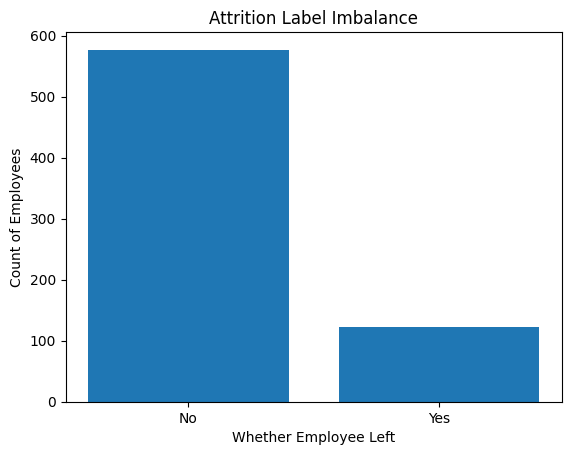

In [68]:
# Plot barplot
plt.bar(attrition_values.index, attrition_values.values)
plt.title('Attrition Label Imbalance')
plt.xlabel('Whether Employee Left')
plt.ylabel('Count of Employees')
plt.show()

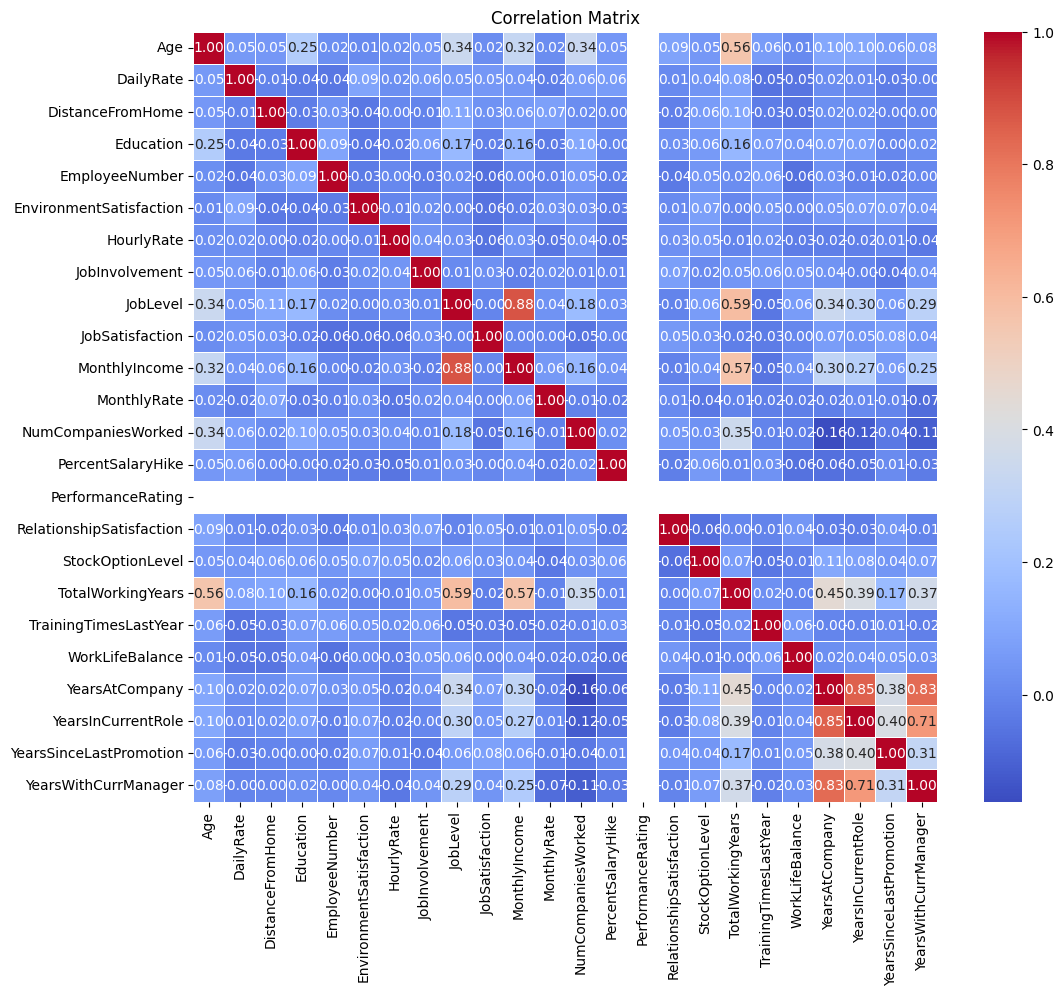

In [ ]:


correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [71]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,15,4,...,3,4,0,10,3,3,9,5,0,8
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,16,1,...,3,4,1,5,1,2,5,2,4,3


In [ ]:

summary = df.describe()
print(summary)


              Age    DailyRate  DistanceFromHome   Education  EmployeeNumber  \
count  699.000000   699.000000        699.000000  699.000000      699.000000   
mean    34.895565   807.708155          9.367668    2.864092     1034.693848   
std      8.446306   399.049179          8.168051    1.033874      603.889794   
min     18.000000   103.000000          1.000000    1.000000        4.000000   
25%     29.000000   471.000000          2.000000    2.000000      499.000000   
50%     34.000000   812.000000          7.000000    3.000000     1013.000000   
75%     40.000000  1159.500000         15.000000    4.000000     1566.000000   
max     60.000000  1498.000000         29.000000    5.000000     2068.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               699.000000  699.000000      699.000000  699.000000   
mean                  2.719599   65.942775        2.731044    1.696710   
std                   1.093771   20.458908        0.71158

In [73]:
# Split into training and testing set
train_df, test_df = train_test_split(df, test_size = 0.05, stratify = df['Attrition'], random_state = 32)
train_df.shape, test_df.shape
     

((664, 32), (35, 32))

In [74]:
print("Attrition train")
print(train_df['Attrition'].value_counts()/len(train_df))
print("Attrition test")
print(test_df['Attrition'].value_counts()/len(test_df))

Attrition train
Attrition
No     0.825301
Yes    0.174699
Name: count, dtype: float64
Attrition test
Attrition
No     0.828571
Yes    0.171429
Name: count, dtype: float64


In [75]:
test_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
463,26,Yes,Travel_Rarely,471,Research & Development,24,3,Technical Degree,622,3,...,3,2,0,1,3,1,1,0,0,0
1261,38,No,Travel_Rarely,833,Research & Development,18,3,Medical,1766,2,...,3,3,1,15,2,3,1,0,1,0
1201,23,Yes,Travel_Rarely,1320,Research & Development,8,1,Medical,1684,4,...,3,1,0,5,2,3,5,4,1,2
1233,30,No,Travel_Rarely,793,Research & Development,16,1,Life Sciences,1729,2,...,3,2,1,10,2,2,10,0,0,8
569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,789,1,...,3,2,0,10,1,3,10,7,0,9


In [81]:

# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Creating a new DataFrame with only categorical columns
categorical = df[categorical_columns]

# Printing the categorical DataFrame
print(categorical.head())

   Attrition     BusinessTravel              Department EducationField  \
2        Yes      Travel_Rarely  Research & Development          Other   
3         No  Travel_Frequently  Research & Development  Life Sciences   
5         No  Travel_Frequently  Research & Development  Life Sciences   
11        No      Travel_Rarely  Research & Development  Life Sciences   
12        No      Travel_Rarely  Research & Development  Life Sciences   

    Gender                JobRole MaritalStatus OverTime  
2     Male  Laboratory Technician        Single      Yes  
3   Female     Research Scientist       Married      Yes  
5     Male  Laboratory Technician        Single       No  
11  Female  Laboratory Technician        Single      Yes  
12    Male     Research Scientist      Divorced       No  


In [83]:

# Ensure categorical contains only column names, not the entire DataFrame
categorical_columns = categorical.columns  

# Create dummy variables for categorical features in the test set
test_dummy = pd.get_dummies(test_df[categorical_columns], drop_first=True)

# Display the first few rows
test_dummy.head()


,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Sales,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
463,True,False,True,False,False,False,False,True,True,True,False,False,False,False,False,True,True
1261,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True
1201,True,False,True,False,False,True,False,False,True,True,False,False,False,False,False,True,True
1233,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False
569,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False


In [84]:
# Concat encoded features
test_df = pd.concat([test_df, test_dummy], axis=1)
# Drop original categorical columns
test_df.drop(columns = categorical, inplace=True)
test_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,EducationField_Technical Degree,Gender_Male,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
463,26,471,24,3,622,3,66,1,1,4,...,True,True,True,False,False,False,False,False,True,True
1261,38,833,18,3,1766,2,60,1,2,4,...,False,True,False,False,False,False,False,True,False,True
1201,23,1320,8,1,1684,4,93,2,1,3,...,False,True,True,False,False,False,False,False,True,True
1233,30,793,16,1,1729,2,33,3,1,4,...,False,True,False,False,True,False,False,True,False,False
569,36,1434,8,4,789,1,76,2,3,1,...,False,True,False,False,False,True,False,False,True,False


In [85]:
# Rename target column
test_df.rename(columns={'Attrition_Yes': 'attrition'}, inplace=True)
test_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,EducationField_Technical Degree,Gender_Male,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
463,26,471,24,3,622,3,66,1,1,4,...,True,True,True,False,False,False,False,False,True,True
1261,38,833,18,3,1766,2,60,1,2,4,...,False,True,False,False,False,False,False,True,False,True
1201,23,1320,8,1,1684,4,93,2,1,3,...,False,True,True,False,False,False,False,False,True,True
1233,30,793,16,1,1729,2,33,3,1,4,...,False,True,False,False,True,False,False,True,False,False
569,36,1434,8,4,789,1,76,2,3,1,...,False,True,False,False,False,True,False,False,True,False


In [86]:
# Features
test_x = test_df.drop('attrition', axis=1)
# Targer label
test_y = test_df['attrition']

test_x.shape, test_y.shape

((35, 40), (35,))

In [89]:
from sklearn.preprocessing import StandardScaler
# Apply feature scaling to numerical columns using StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# Display the first few rows of scaled numerical features
print("Preview of scaled numerical features:")
print(df_scaled[num_cols].head())

Preview of scaled numerical features:
         Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
2   0.249333   1.417611         -0.902656  -0.836379       -1.707980   
3  -0.224586   1.465259         -0.780141   1.099478       -1.706323   
5  -0.343066   0.494759         -0.902656  -0.836379       -1.701352   
11 -0.698505  -1.641845          0.690050  -0.836379       -1.689752   
12 -0.461546  -0.345338          2.037725  -1.804308       -1.688095   

    EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
2                  1.171468    1.274549       -1.028080 -0.960599   
3                  1.171468   -0.486336        0.378237 -0.960599   
5                  1.171468    0.638674        0.378237 -0.960599   
11                 1.171468   -0.828730       -1.028080  0.418166   
12                -1.573301   -1.709172        0.378237 -0.960599   

    JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
2          0.259654  ...                0

In [90]:
#Exploratory Data ANalysis

C:\Users\karunya\AppData\Local\Temp\ipykernel_21140\3534379343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df['MonthlyIncome'], palette="coolwarm")


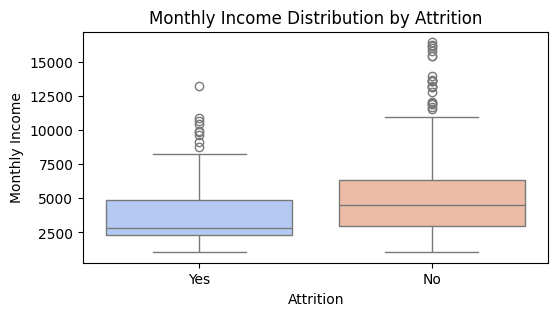

In [91]:
#Attrition vs. salary
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Attrition'], y=df['MonthlyIncome'], palette="coolwarm")
plt.title("Monthly Income Distribution by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()


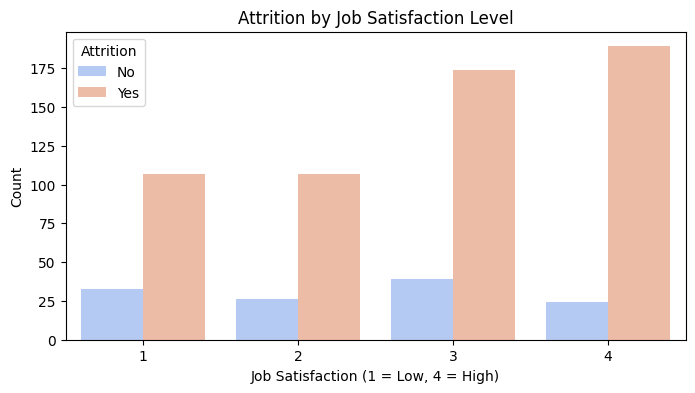

In [93]:
#2️⃣ Attrition vs. Job Satisfaction (Bar Plot)
plt.figure(figsize=(8, 4))
sns.countplot(x=df['JobSatisfaction'], hue=df['Attrition'], palette="coolwarm")
plt.title("Attrition by Job Satisfaction Level")
plt.xlabel("Job Satisfaction (1 = Low, 4 = High)")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()
 

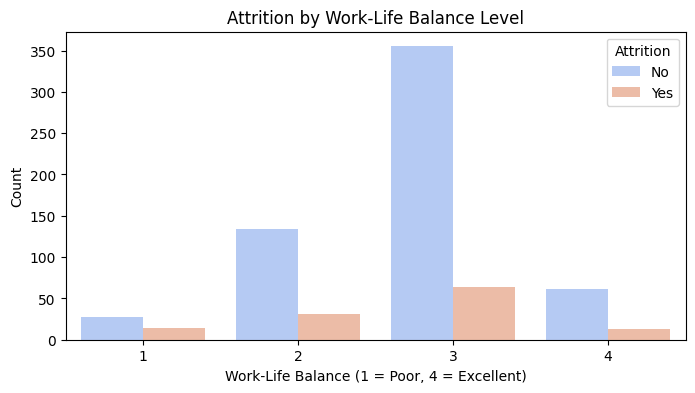

In [94]:
#Work-Life Balance vs. Attrition
plt.figure(figsize=(8, 4))
sns.countplot(x=df['WorkLifeBalance'], hue=df['Attrition'], palette="coolwarm")
plt.title("Attrition by Work-Life Balance Level")
plt.xlabel("Work-Life Balance (1 = Poor, 4 = Excellent)")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()


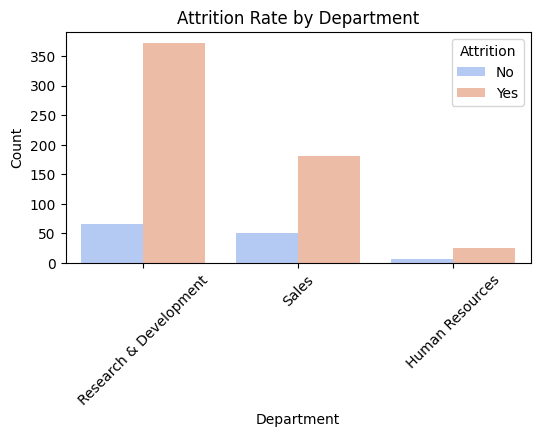

In [96]:
#attrition by department
plt.figure(figsize=(6, 3))
sns.countplot(x=df['Department'], hue=df['Attrition'], palette="coolwarm")
plt.title("Attrition Rate by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.show()


In [98]:
#Feature Engineering
#Create Tenure Categories

# Creating tenure categories
def categorize_tenure(years):
    if years < 2:
        return "New Employee"
    elif 2 <= years < 5:
        return "Mid-Level"
    elif 5 <= years < 10:
        return "Experienced"
    else:
        return "Senior"

df['TenureCategory'] = df['YearsAtCompany'].apply(categorize_tenure)

# One-hot encode the categorical feature
df = pd.get_dummies(df, columns=['TenureCategory'], drop_first=True)



In [99]:
#Performance metrics
df['High_Performer'] = df['PerformanceRating'].apply(lambda x: 1 if x >= 3 else 0)


In [100]:
#Engagement score 
df['EngagementScore'] = df['JobSatisfaction'] + df['WorkLifeBalance']


In [101]:
df['Income_Satisfaction'] = df['MonthlyIncome'] * df['JobSatisfaction']
df['Work_Balance_Tenure'] = df['WorkLifeBalance'] * df['YearsAtCompany']


In [102]:
# Save the final dataset as a CSV file
df.to_csv("Final_Processed_Employee_Data.csv", index=False)
print("Dataset saved successfully!")

Dataset saved successfully!


In [103]:
##Logistic Regression model

In [104]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [1]:
import pandas as pd 
df= pd.read_csv("C:/Users/karunya/Documents/Guvi projects/Employee Attrition/Employee-Attrition - Employee-Attrition.csv")
# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # Avoids dummy variable trap

# Save the encoded dataset
df_encoded.to_csv("C:/Users/karunya/Documents/Guvi projects/Employee Attrition/Final_Processed_Employee_Data.csv", index=False)

print("✅ Categorical encoding complete!")


✅ Categorical encoding complete!


In [3]:
# Identify the correct Attrition column
if 'Attrition_Yes' in df_encoded.columns:
    df_encoded.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True)
elif 'Attrition_No' in df_encoded.columns:
    df_encoded.rename(columns={'Attrition_No': 'Attrition'}, inplace=True)

print("Final Target Column:", df_encoded.columns)



Final Target Column: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'J

In [5]:
# Load final dataset
df = df_encoded

# Define features & target
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict & Evaluate
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8503401360544217


c:\Users\karunya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


c:\Users\karunya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

✅ Accuracy: 0.850
✅ Precision: 0.714
✅ Recall: 0.106
✅ F1 Score: 0.185

🔍 Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.99      0.92       247
        True       0.71      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.83      0.85      0.80       294



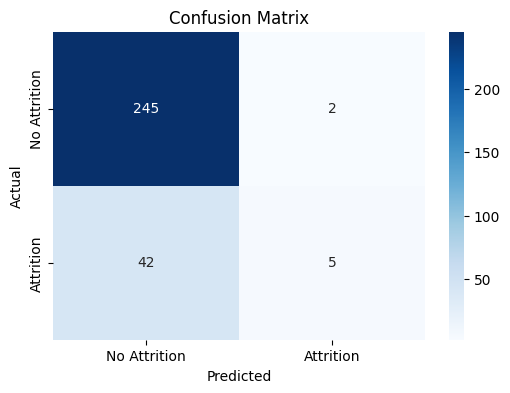

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f"✅ Accuracy: {accuracy:.3f}")
print(f"✅ Precision: {precision:.3f}")
print(f"✅ Recall: {recall:.3f}")
print(f"✅ F1 Score: {f1:.3f}")

# Print detailed classification report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Show confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [7]:
#Random forest model : optional
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("🔍 Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))


🔍 Random Forest Model Performance:
              precision    recall  f1-score   support

       False       0.85      0.97      0.91       247
        True       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294

